# Кластеризация k-means

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#файл с исходными данными
input_file = r'c:/Users/i.ignatov/Python/Clustering/input.xlsx'
#файл, в который сохраняем
output_file = r'c:/Users/i.ignatov/Python/Clustering/output.xlsx'
#Загружаем df из csv_utf, файл нужен с целыми числами
data = pd.read_excel(input_file, header=0)
#Название первого столбца в df
first_column_name = data.columns[0]
data.head()

,Магазин,1,2,3,4,5,6,7,8,9,10,11,12
0,11CH2175,0.766086,1.030081,1.134663,0.897943,0.959141,0.978072,0.996558,0.988131,1.008106,1.062621,0.996062,1.345091
1,11CH2176,0.776231,1.008442,1.107409,0.923819,0.974114,0.955446,1.022391,1.007359,1.002152,1.095526,1.017576,1.281441
2,11CH2177,0.742569,1.042762,1.085432,0.903558,0.959242,0.942480,0.987952,1.018954,1.000126,1.068906,1.013004,1.385625
3,11CH2178,0.778689,0.986163,1.128918,0.937447,1.004897,0.977409,1.011692,0.992538,0.923980,1.087275,0.983676,1.262854
4,11CH2181,0.800310,0.995067,1.109790,0.955064,0.985697,0.968641,1.014440,0.997615,0.992592,1.091014,0.993575,1.249657


C:\Users\i.ignatov\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\i.ignatov\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\i.ignatov\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\i.ignatov\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

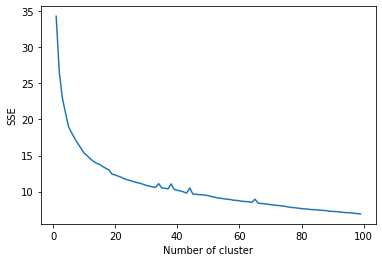

In [35]:
from sklearn.cluster import KMeans
#Создаем датафрейм для определения значения K
data_k = data.iloc[:,1:]

sse = {}

for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_k)
    data_k["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [26]:
#Задаём кол-во кластеров в (точка перелома на графике)
n_clusters = 100

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
  
# read data (drop last empty column, caused by an extra (last) colon in the header)
data = data.dropna(axis=1, how='all')
  
# normalize data
scaler = StandardScaler()
# В столбце 1 - магазин
X = scaler.fit_transform(data.drop(first_column_name, 1))
  
km = KMeans(n_clusters=n_clusters)
  
# fit & predict clusters
data['cluster'] = km.fit_predict(X)
  
data.head()

C:\Users\i.ignatov\AppData\Local\Temp\ipykernel_21992\1293754068.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = scaler.fit_transform(data.drop(first_column_name, 1))
C:\Users\i.ignatov\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\i.ignatov\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Магазин,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,11CH2175,0.766086,1.030081,1.134663,0.897943,0.959141,0.978072,0.996558,0.988131,1.008106,1.062621,0.996062,1.345091,65
1,11CH2176,0.776231,1.008442,1.107409,0.923819,0.974114,0.955446,1.022391,1.007359,1.002152,1.095526,1.017576,1.281441,3
2,11CH2177,0.742569,1.042762,1.085432,0.903558,0.959242,0.942480,0.987952,1.018954,1.000126,1.068906,1.013004,1.385625,64
3,11CH2178,0.778689,0.986163,1.128918,0.937447,1.004897,0.977409,1.011692,0.992538,0.923980,1.087275,0.983676,1.262854,73
4,11CH2181,0.800310,0.995067,1.109790,0.955064,0.985697,0.968641,1.014440,0.997615,0.992592,1.091014,0.993575,1.249657,26


In [28]:
data.to_excel(output_file)